# Fisher's Iris flowers and ACP in Scilab

Here is an example of Principal component analysis of the famous Fisher's iris flower dataset 
(see https://en.wikipedia.org/wiki/Iris_flower_data_set) within Scilab. We don't use any statistics toolbox
in order to illustrate how the computations are made.

## Read the data

First we download the dataset and read it as a table:

In [23]:
http_get("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv","iris.csv");
t = readtable("iris.csv")


 t = [150x5 table]

   sepal_length   sepal_width   petal_length   petal_width    species 
   ____________   ___________   ____________   ___________   _________
                                                                      
   5.1            3.5           1.4            0.2           setosa   
   4.9            3             1.4            0.2           setosa   
   4.7            3.2           1.3            0.2           setosa   
       ...            ...           ...            ...          ...   
   6.5            3             5.2            2             virginica
   6.2            3.4           5.4            2.3           virginica
   5.9            3             5.1            1.8           virginica



Each row gives the values of the 4 variables (names are given on the first line). Let us extract the actual data matrix $X$, as well as the variable names and the species names:

In [24]:
var = t.Properties.VariableNames(1:$-1);
species = t.species;
X = table2matrix(t(:,1:$-1));
[spe,_,k] = unique(species);
N = size(X,1);

The data matrix $X$ is then centered (the row-wise mean is substracted for each column/variable) 
and normalized (each column/variable is divided by its row-wise standard deviation)

In [25]:
X = center(X,1)./stdev(X,1)(ones(N,1),:);

## Compute the eigenpairs of the correlation matrix

We then compute the eigenpairs of the variance-covariance matrix $\frac{1}{{n-1}}X^\top X$ by computing the (economy size) singular values decomposition of $$\frac{1}{\sqrt{n-1}}X = USV^\top$$

In [26]:
[U,S,V] = svd(X/sqrt(N-1),"e");
S


 S = [4x4 double]

   1.706112   0.          0.          0.       
   0.         0.9598025   0.          0.       
   0.         0.          0.3838662   0.       
   0.         0.          0.          0.1435538



The columns of $V$, given by

In [27]:
V


 V = [4x4 double]

   0.5223716  -0.3723184   0.7210168   0.2619956
  -0.2633549  -0.9255565  -0.2420329  -0.1241348
   0.581254   -0.0210948  -0.1408923  -0.8011543
   0.565611   -0.0654158  -0.6338014   0.5235463



are the eigenvectors of the variance-covariance matrix and the singular values on the diagonal of $S$ 
are the square roots of associated eigenvalues $\lambda_1\geq\lambda_2\geq\lambda_3\geq\lambda_4)$. The principal components are then obtained as

In [28]:
Y = X*V;

For example, it means that the first principal component $PC_1$ is obtained as 
$$
PC_1 = 0.5223716\, x_1 -0.2633549 \, x_2 + 0.581254 \, x_3 + 0.565611 \,x_4,
$$
where $x_1,x_2,x_3,x_4$ denote the mean centered and standardized original variables (sepal length, sepal width, petal length and petal width).

The amount of information contained in the principal components can be evaluated by plotting the ratio between the eigenvalues and their sum (equal to 4, the number of variables):


 ratio = [4x1 double]

   0.7277045
   0.2303052
   0.0368383
   0.0051519



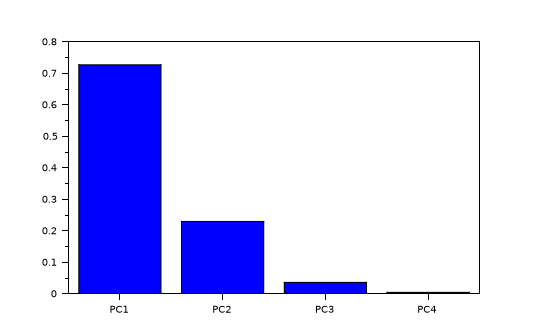

In [29]:
ratio = diag(S).^2/4
bar(ratio);
gca().x_ticks.labels = "PC"+string(1:4)';

## Data on the principal plane

These values show that 95% of the dataset variance is explained by the first two principal
components (PC1,PC2). We can now represent the individuals in the (PC1,PC2) plane by using the
first two columns of `Y` matrix:

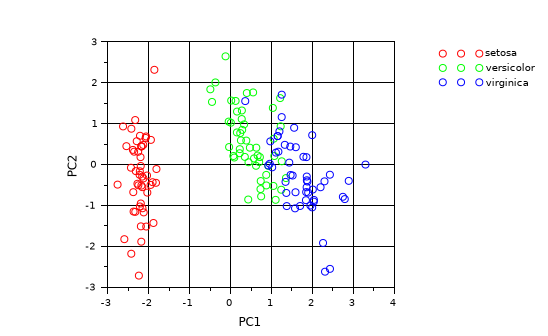

In [30]:
setosa = species=="setosa";
versicolor = species=="versicolor";
virginica = species=="virginica";

scatter(Y(setosa,1),Y(setosa,2),36,color("red"))
scatter(Y(versicolor,1),Y(versicolor,2),36,color("green"))
scatter(Y(virginica,1),Y(virginica,2),36,color("blue"))
legend(spe,-1).line_mode="off";
xlabel PC1
ylabel PC2
isoview on
xgrid

## Correlation circle

The _loadings_ or correlations between original variables and principal
components are computed as

In [31]:
C = V*S


 C = [4x4 double]

   0.8912245  -0.3573521   0.276774    0.0376105
  -0.449313   -0.8883515  -0.0929082  -0.01782  
   0.9916844  -0.0202468  -0.0540838  -0.1150088
   0.9649958  -0.0627862  -0.243295    0.0751571



Each term $c_{ij}$ of the above matrix gives the Pearson's correlation between the
$j$th principal component and the $i$th original variable. For each variable $i$ we can 
depict this correlation as a vector with point $(c_{i,1},c_{i,2})$ as extremity in the $(PC1,PC2)$ plane :

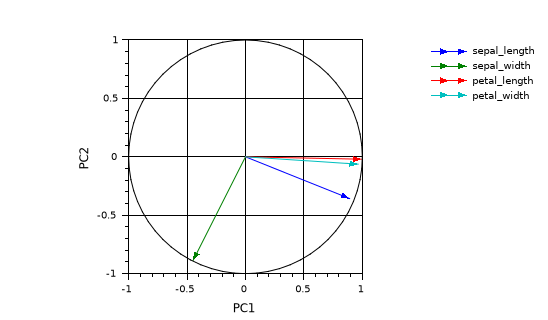

In [32]:
function corr_circle(k,l)
    h = plot((C(:,k).*.[0 1])',(C(:,l).*.[0 1])');
    h.polyline_style = 4;
    h.arrow_size_factor = 2;
    xlabel("PC"+string(k))
    ylabel("PC"+string(l))
    legend(var,-1).line_mode="off";
    xarc(-1,1,2,2,0,360*64)
    xgrid
    isoview on
end

corr_circle(1,2)

The direction and norm of the vectors actually make sense. Here, as all vectors have a
norm close to 1
(extremities are close to the unit circle) one can say that all variables are well represented by PC1 and PC2.
When looking at relative angles, petal width and petal length are strongly correlated with PC1, which means that
on the individials plot, individuals on the left have smaller petals. The orthogonality between vectors of sepal
length and width means that they are not correlated.

Here all variables are well represented, but to illustrate how may look a poorly represented variable on
the correlation circle we can use PC3 and PC4 as principal component :

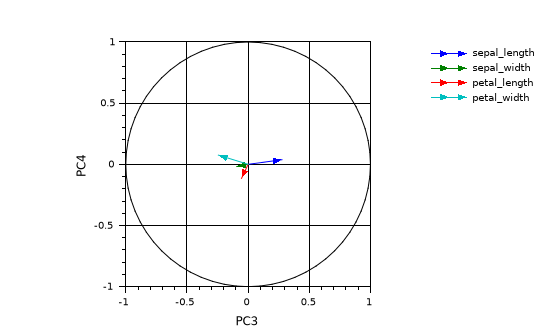

In [33]:
corr_circle(3,4)

In fact, when arrows are small even the direction is irrelevant. Here we have the confirmation 
that PC1 and PC2 sum up almost all the original information in the dataset.